## 1. 경사하강법의 종류
* local optima에서 빠져나와야 함..
-> 

1) 전체-배치 경사하강법(Full-Batch Gradient Decent)
2) 확률적 경사하강법(Stochastic Gradient Decent)
3) Mini-Batch Gradient Decent

In [1]:
class LinearRegressionGD(object):
    def __init__(self, fit_intercept=True, copy_X=True,
                 eta0=0.001, epochs=1000, batch_size = 1,
                 weight_decay=0.9, shuffle=True):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self._eta0 = eta0 
        self._epochs = epochs
        
        self._cost_history = []
        
        self._coef = None
        self._intercept = None
        self._new_X = None
        self._w_history = None
        self._weight_decay = weight_decay
        self._batch_size = batch_size
        self._is_SGD = shuffle
        
    def gradient(self, X, y, theta):
        return X.T.dot(self.hypothesis_function(X, theta)-y) / len(X)

    def fit(self, X, y):
        self._new_X = np.array(X) # X 데이터 할당
        y = y.reshape(-1, 1)
    
        if self.fit_intercept: # intercept 추가 여부
            #1로만 구성된 상수항을 모든 데이터에 추가
            intercept_vector = np.ones([len(self._new_X), 1])
            self._new_X = np.concatenate(
                (intercept_vector, self._new_X), axis=1)
        
        theta_init = np.random.normal(0, 1, self._new_X.shape[1])
        #weight 값 초기화
        self._w_history = [theta_init]
        self_cost_history = [self.cost(
        self.hypothesis_function(self._new_X, theta_init), y)]
    
        theta = theta_init
    
        for epoch in range(self._epochs):
            X_copy = np.copy(self._new_X)
        
            if self._is_SGD:
                np.random.shuffle(X_copy)
            
            batch = len(X_copy) // self._batch_size
        
            for batch_count in range(batch):
                X_batch = np.copy(
                    X_copy[batch_count * self._batch_size: (batch_count+1) & self._batch_size])
            
                gradient = self.gradient(X_batch, y, theta).flatten()
                theta = theta - self._eta0 * gradient
            
            if epoch % 100 == 0:
                self._w_history.append(theta)
                cost = self.cost(
                    self.hypothesis_function(self._new_X, theta), y)
                self._cost_history.append(cost)
            self._eta0 = self._eta0 * self._weight_decay
            
        if self.fit_intercept:
            self._intercept = theta[0]
            self._coef = theta[1:]
        else:
            self._coef = theta
            
    def cost(self, h, y):
        return 1/(2*len(y)) * np.sum((h-y).flatten() ** 2)

    def hypothesis_function(self, X, theta):
        return X.dot(theta).reshape(-1, 1)

    def gradient(self, X, y, theta):
        return X.T.dot(self.hypothesis_function(X, theta)-y) / len(X)

    def fit(self, X, y):
        self._new_X = np.array(X)
        
        y = y.reshape(-1, 1)
        
        if self.fit_intercept:
            intercept_vector = np.ones([len(self._new_X), 1])
            self._new_X = np.concatenate(
                (intercept_vector, self._new_X), axis=1)
            
        theta_init = np.random.normal(0, 1, self._new_X.shape[1])
        self._w_history = [theta_init]
        self._cost_history = [self.cost(
            self.hypothesis_function(self._new_X, theta_init), y)]
        
        theta = theta_init
        
        for epoch in range(self._epochs):
            gradient = self.gradient(self._new_X, y, theta).flatten()
            theta = theta - self._eta0 * gradient
            
            if epoch % 100 == 0:
                self._w_history.append(theta)
                cost = self.cost(
                    self.hypothesis_function(self._new_X, theta), y)
                self._cost_history.append(cost)
            self._eta0 = self._eta0 * self._weight_decay
            
        if self.fit_intercept:
            self._intercept = theta[0]
            self._coef = theta[1:]
        else:
            self._coef = theta
            
    def predict(self, X):
        test_X = np.array(X)
        
        if self.fit_intercept:
            intercept_vector = np.ones([len(test_X), 1])
            test_X = np.concatenate(
                (intercept_vector, test_X), axis=1)
            weights = np.concatenate(([self._intercept], self._coef), axis=0)
        else:
            weights = self._coef
            
        return test_X.dot(weights)
    
    @property
    def coef(self):
        return self._coef
    
    @property
    def intercept(self):
        return self._intercept
    
    @property
    def weights_history(self):
        return np.array(self._w_history)
    
    @property
    def cost_history(self):
        return self._cost_history

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/ch08/train.csv')

In [3]:
X = df['x'].values.reshape(-1, 1)
y = df['y'].values

In [4]:
X

array([[ 24],
       [ 50],
       [ 15],
       [ 38],
       [ 87],
       [ 36],
       [ 12],
       [ 81],
       [ 25],
       [  5],
       [ 16],
       [ 16],
       [ 24],
       [ 39],
       [ 54],
       [ 60],
       [ 26],
       [ 73],
       [ 29],
       [ 31],
       [ 68],
       [ 87],
       [ 58],
       [ 54],
       [ 84],
       [ 58],
       [ 49],
       [ 20],
       [ 90],
       [ 48],
       [  4],
       [ 25],
       [ 42],
       [  0],
       [ 60],
       [ 93],
       [ 39],
       [  7],
       [ 21],
       [ 68],
       [ 84],
       [  0],
       [ 58],
       [ 19],
       [ 36],
       [ 19],
       [ 59],
       [ 51],
       [ 19],
       [ 33],
       [ 85],
       [ 44],
       [  5],
       [ 59],
       [ 14],
       [  9],
       [ 75],
       [ 69],
       [ 10],
       [ 17],
       [ 58],
       [ 74],
       [ 21],
       [ 51],
       [ 19],
       [ 50],
       [ 24],
       [  0],
       [ 12],
       [ 75],
       [ 21],
      

In [5]:
gd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=False)
bgd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=len(X), shuffle=False)
sgd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=True)
msgd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=100, shuffle=True)

In [6]:
gd_lr.fit(X, y)

In [7]:
bgd_lr.fit(X, y)
sgd_lr.fit(X, y)
msgd_lr.fit(X, y)

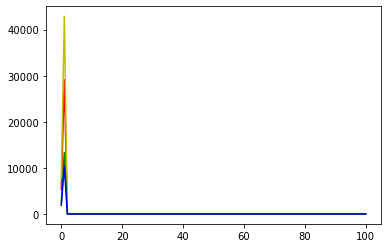

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(len(gd_lr.cost_history)), gd_lr.cost_history, c='r')
plt.plot(range(len(bgd_lr.cost_history)), bgd_lr.cost_history, c='y')
plt.plot(range(len(sgd_lr.cost_history)), sgd_lr.cost_history, c='g')
plt.plot(range(len(msgd_lr.cost_history)), msgd_lr.cost_history, c='b')

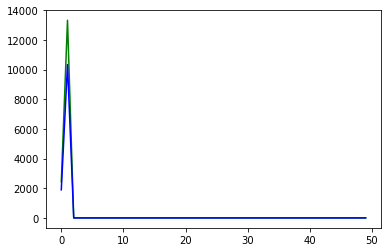

In [9]:
plt.plot(range(50), sgd_lr.cost_history[:50], c='g')
plt.plot(range(50), msgd_lr.cost_history[:50], c='b')

## 2. Overfit and Regularization

### L2 정규화: 리지 회귀(ridge regression)
### L1 정규화: 라쏘 회귀(lasso regression)

## 3. Scikit-Learn을 이용한 선형회귀

In [10]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

boston = load_boston()
boston.keys()

/Users/seunghoonyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [11]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
x_data = boston.data
y_data = boston.target.reshape(boston.target.size, 1)
y_data.shape

(506, 1)

In [14]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 5)).fit(x_data) # (1)
x_scaled_data = minmax_scale.transform(x_data)

x_scaled_data[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339, 1), (167, 1))

#### 데이터 학습하기

In [19]:
from sklearn import linear_model

regr = linear_model.LinearRegression(
    fit_intercept=True, copy_X=True, n_jobs=8)

lasso_regr = linear_model.Lasso(
    alpha=0.01, fit_intercept=True, copy_X=True)

ridge_regr = linear_model.Ridge(
    alpha=0.01, fit_intercept=True, copy_X=True)

SGD_regr = linear_model.SGDRegressor(penalty="l2", alpha=0.01,
                                     max_iter = 1000, tol=0.001, eta0=0.01)

In [20]:
regr.fit(X_train, y_train)

LinearRegression(n_jobs=8)

In [21]:
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [[-1.49269434  0.63445126  0.03416403  0.34702703 -1.58126818  4.16717057
  -0.05101416 -3.15383803  1.34076477 -1.22786763 -1.83726193  0.63135463
  -3.97947048]]
intercept:  [27.18533067]


In [22]:
regr.predict(x_data[:5])

array([[-110.45322967],
       [ -79.2419604 ],
       [ -57.38467939],
       [ -31.27579993],
       [ -39.21592191]])

In [23]:
x_data[:5].dot(regr.coef_.T) + regr.intercept_

array([[-110.45322967],
       [ -79.2419604 ],
       [ -57.38467939],
       [ -31.27579993],
       [ -39.21592191]])

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.7264393391128401, 3.324674060833931, 22.832009552009488)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

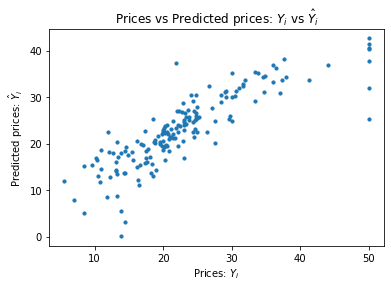

In [26]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")